To generate the pickle file:

    cd CEO/src
    python -m main.azure_rl --get-training-progress ../notebooks/progress.pkl


In [41]:
# Load the pickle file
import pickle

with open("progress.pkl", "rb") as f:
    data = pickle.load(f)
    
print("data keys", data.keys())
progress_df = data["progress"]
# progress_df = progress_df.set_index(keys=["training_id", "episode"]).sort_index(axis=0, level=[0,1])
display(progress_df.shape)

data keys dict_keys(['trainings', 'progress'])


(3241, 7)

In [42]:
progress_df

,training_id,episode,avg_rewards,recent_rewards,states_visited,explore_rate,pct_win
0,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,88000,-0.178682,-0.0802,97195,0.006083,NaN
1,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,144000,-0.119625,-0.0062,128872,0.005855,NaN
2,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,202000,-0.079050,0.0342,156606,0.006030,NaN
3,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,262000,-0.049511,0.0528,181464,0.006388,NaN
4,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,322000,-0.024466,0.0896,203276,0.006220,NaN
...,...,...,...,...,...,...,...
3236,tid_e34264b0-c36c-4ebb-8271-80ca0300027e,2324000,0.301942,0.3326,858520,0.058678,NaN
3237,tid_e34264b0-c36c-4ebb-8271-80ca0300027e,2376000,0.302519,0.3286,864209,0.060363,NaN
3238,tid_e34264b0-c36c-4ebb-8271-80ca0300027e,2422000,0.303000,0.3194,868894,0.059754,NaN
3239,tid_e34264b0-c36c-4ebb-8271-80ca0300027e,2474000,0.303634,0.3350,873971,0.060660,NaN


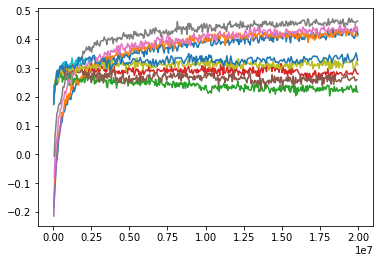

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = progress_df.pivot(index="episode", columns="training_id", values="recent_rewards")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='')

plt.show()

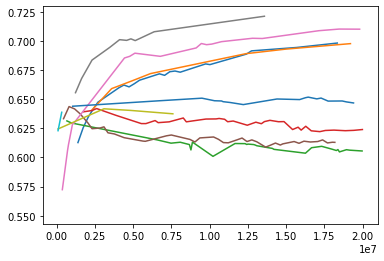

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = progress_df.pivot(index="episode", columns="training_id", values="pct_win")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='')

plt.show()